# Работа со строковыми значениями

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Работа со строковыми значениям"
* https://pyformat.info/
* https://docs.python.org/3/library/re.html
    * https://docs.python.org/3/library/re.html#flags
    * https://docs.python.org/3/library/re.html#functions
* https://pythonru.com/primery/primery-primeneniya-regulyarnyh-vyrazheniy-v-python
* https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
* https://realpython.com/nltk-nlp-python/

## Задачи для совместного разбора

1. Вывести на экран данные из словаря `obj` построчно в виде `k = v`, задав формат таким образом, чтобы знак равенства оказался на одной и той же позиции во всех строках. Строковые литералы обернуть в кавычки.

In [1]:
obj = {
    "home_page": "https://github.com/pypa/sampleproject",
    "keywords": "sample setuptools development",
    "license": "MIT",
}

2. Написать регулярное выражение,которое позволит найти номера групп студентов.

In [4]:
obj = pd.Series(["Евгения гр.ПМ19-1", "Илья пм 20-4", "Анна 20-3"])
obj

0    Евгения гр.ПМ19-1
1         Илья пм 20-4
2            Анна 20-3
dtype: object

In [ ]:
import nltk
nltk.download('punkt')

In [12]:
import re

In [13]:
?re


3. Разбейте текст формулировки задачи 2 на слова.

## Лабораторная работа 6

### Форматирование строк

1\. Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в виде `pd.DataFrame` `recipes` При помощи форматирования строк выведите информацию об id рецепта и времени выполнения 5 случайных рецептов в виде таблицы следующего вида:

    
    |      id      |  minutes  |
    |--------------------------|
    |    61178     |    65     |
    |    202352    |    80     |
    |    364322    |    150    |
    |    26177     |    20     |
    |    224785    |    35     |
    
Обратите внимание, что ширина столбцов заранее неизвестна и должна рассчитываться динамически, в зависимости от тех данных, которые были выбраны. 

In [2]:
import pandas as pd

In [915]:
recipes = pd.read_csv('recipes_sample.csv')

In [917]:
#f"{recipes.sample(5)[['id','minutes']].to_string(index = False)}"


In [285]:
df = recipes[['id','minutes']].sample(5)
max_len_id = len(str(df.id.min()))
max_len_minutes = len(str(df.minutes.min()))


In [463]:
df = recipes[['id','minutes']].sample(5)
max_len_id = len(str(df.id.max()))
max_len_minutes = len(str(df.minutes.max()))

print(f"|{df.columns[0]:^{max_len_id*2+2}}|{df.columns[1]:^{max_len_id*2 - 1}}| \n|{'-'*(max_len_id*2+2 + max_len_id*2)}|")
for i,j in zip(df['id'],df['minutes']):
    print(f"|{i:^{max_len_id*2+2}}|{j:^{max_len_id*2 -1}}|")

|      id      |  minutes  | 
|--------------------------|
|    103947    |    80     |
|    231413    |    30     |
|    37088     |     8     |
|    18834     |    25     |
|    188139    |    35     |


2\. Напишите функцию `show_info`, которая по данным о рецепте создает строку (в смысле объекта python) с описанием следующего вида:

```
"Название Из Нескольких Слов"

1. Шаг 1.
2. Шаг 2.
----------
Автор: contributor_id
Среднее время приготовления: minutes минут
```

    
Данные для создания строки получите из файлов `recipes_sample.csv` (__ЛР2__) и `steps_sample.xml` (__ЛР3__). 
Вызовите данную функцию для рецепта с id `170895` и выведите (через `print`) полученную строку на экран.

In [529]:
from bs4 import BeautifulSoup 

with open('steps_sample.xml') as fd:
    doc = BeautifulSoup(fd, 'xml')


In [530]:
steps_sample = []
for person in doc.recipes.find_all('recipe'):
    ph = [phones.next for phones in person.steps.find_all('step')]
    steps_sample.append({person.find('id').next: ph})
# steps_sample

In [918]:
# steps_sample

In [919]:
# recipes.head()

In [694]:
id_170895 = recipes[recipes['id'] == 170895]
steps = [] 
minutes = id_170895['minutes'] 
author_id = id_170895['contributor_id'] 
name = id_170895['name']
for i in steps_sample:
    for k,v in i.items():
        if int(k) == 170895:
            steps = v


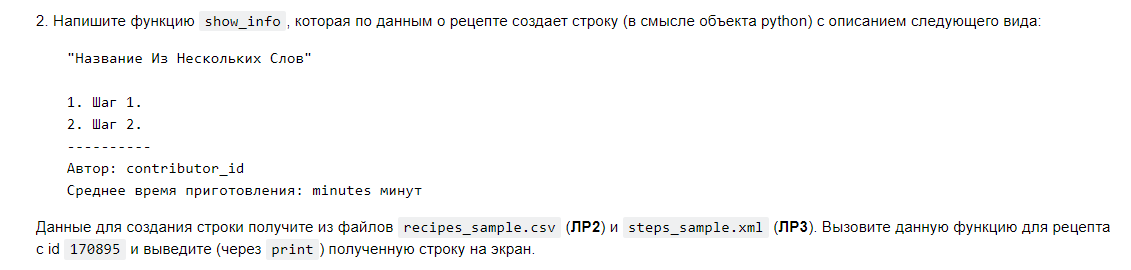

In [743]:
def show_info(name, steps, minutes, author_id):

        
#     print(f'----------\nАвтор: {int(author_id)}\nСреднее время приготовления: {int(minutes)} минут\n')
    a = str(f'{name.to_string(index = False).title()}')
    for i,j in enumerate(steps_sample):
        b = f'\n{i+1}. {j}'
        print(b)
#     for i, j in enumerate(steps, 1):
#          print(f'{i}. {j.capitalize()}')
#     print(f"----------")
    
    
# assert (
#     show_info(
#         name="george s at the cove black bean soup",
#         steps=[
#             "clean the leeks and discard the dark green portions",
#             "cut the leeks lengthwise then into one-inch pieces",
#             "melt the butter in a medium skillet , med",
#         ],
#         minutes=90,
#         author_id=35193,
#     )
#     == '"George S At The Cove Black Bean Soup"\n\n1. Clean the leeks and discard the dark green portions\n2. Cut the leeks lengthwise then into one-inch pieces\n3. Melt the butter in a medium skillet , med\n----------\nАвтор: 35193\nСреднее время приготовления: 90 минут\n'
# )

In [920]:
# show_info(name, steps, minutes, author_id)

In [636]:
def show_info(id,recipes):#, id_xml
    for i in steps_sample:
        for k,v in i.items():
            if int(k) == id:
                    val = recipes[recipes['id'] == 170895]
                    print(f"{val['name']}")
                    for j in range(len(v)):
                        print(f"{j+1}.{v[j]}")
                        
        
    

# assert (
#     show_info(
#         name="george s at the cove black bean soup",
#         steps=[
#             "clean the leeks and discard the dark green portions",
#             "cut the leeks lengthwise then into one-inch pieces",
#             "melt the butter in a medium skillet , med",
#         ],
#         minutes=90,
#         author_id=35193,
#     )
#     == '"George S At The Cove Black Bean Soup"\n\n1. Clean the leeks and discard the dark green portions\n2. Cut the leeks lengthwise then into one-inch pieces\n3. Melt the butter in a medium skillet , med\n----------\nАвтор: 35193\nСреднее время приготовления: 90 минут\n'
# )

In [637]:
show_info(170895,recipes)

15754    leeks and parsnips  sauteed or creamed
Name: name, dtype: object
1.clean the leeks and discard the dark green portions
2.cut the leeks lengthwise then into one-inch pieces
3.melt the butter in a medium skillet , med
4.heat
5.add the garlic and fry 'til fragrant
6.add leeks and fry until the leeks are tender , about 6-minutes
7.meanwhile , peel and chunk the parsnips into one-inch pieces
8.place in a steaming basket and steam 'til they are as tender as you prefer
9.i like them fork-tender
10.drain parsnips and add to the skillet with the leeks
11.add salt and pepper
12.gently sautee together for 5-minutes
13.at this point you can serve it , or continue on and cream it:
14.in a jar with a screw top , add the half-n-half and arrowroot
15.shake 'til blended
16.turn heat to low under the leeks and parsnips
17.pour in the arrowroot mixture , stirring gently as you pour
18.if too thick , gradually add the water
19.let simmer for a couple of minutes
20.taste to adjust seasoning , prob

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
15754,leeks and parsnips sauteed or creamed,170895,27,8377,2006-05-31,21.0,this is good sauteed only or creamed. very eas...,9.0


## Работа с регулярными выражениями

3\. Напишите регулярное выражение, которое ищет следующий паттерн в строке: число (1 цифра или более), затем пробел, затем слова: hour или hours или minute или minutes. Произведите поиск по данному регулярному выражению в каждом шаге рецепта с id 25082. Выведите на экран все непустые результаты, найденные по данному шаблону.

In [913]:
import re
val = []
for i in steps_sample:
    for k,v in i.items():
        if int(k) == 25082:
            val = v
            
mean = ''.join(val)
res = re.compile(r'[0-9]+ (?:hours|minutes|hour|minute)')
print(res.findall(mean))

['20 minutes', '10 minutes', '2 hours', '10 minutes', '20 minutes', '30 minutes']


4\. Напишите регулярное выражение, которое ищет шаблон вида "this..., but" _в начале строки_ . Между словом "this" и частью ", but" может находиться произвольное число букв, цифр, знаков подчеркивания и пробелов. Никаких других символов вместо многоточия быть не может. Пробел между запятой и словом "but" может присутствовать или отсутствовать.

Используя строковые методы `pd.Series`, выясните, для каких рецептов данный шаблон содержится в тексте описания. Выведите на экран количество таких рецептов и 3 примера подходящих описаний (текст описания должен быть виден на экране полностью).

5\. В текстах шагов рецептов обыкновенные дроби имеют вид "a / b". Используя регулярные выражения, уберите в тексте шагов рецепта с id 72367 пробелы до и после символа дроби. Выведите на экран шаги этого рецепта после их изменения.

### Сегментация текста

6\. Разбейте тексты шагов рецептов на слова при помощи пакета `nltk`. Посчитайте и выведите на экран кол-во уникальных слов среди всех рецептов. Словом называется любая последовательность алфавитных символов (для проверки можно воспользоваться `str.isalpha`). При подсчете количества уникальных слов не учитывайте регистр.

7\. Разбейте описания рецептов из `recipes` на предложения при помощи пакета `nltk`. Найдите 5 самых длинных описаний (по количеству _предложений_) рецептов в датасете и выведите строки фрейма, соответствующие этим рецептами, в порядке убывания длины.

8\. Напишите функцию, которая для заданного предложения выводит информацию о частях речи слов, входящих в предложение, в следующем виде:
```
PRP   VBD   DT      NNS     CC   VBD      NNS        RB   
 I  omitted the raspberries and added strawberries instead
``` 
Для определения части речи слова можно воспользоваться `nltk.pos_tag`.

Проверьте работоспособность функции на названии рецепта с id 241106.

Обратите внимание, что часть речи должна находиться ровно посередине над соотвествующим словом, а между самими словами должен быть ровно один пробел.


In [922]:
vаl = [15, bytes([255]), 32, 128]
print(f'{vаl[1]}, {vаl[-1]:#x}, {vаl[0]:08b}, {vаl[2]/2:f}')

b'\xff', 0x80, 00001111, 16.000000


In [927]:
import re

tеxt = '''Я экспериментировал и с новыми видами меда, других сладостей и продуктов происхождения, таких как амарант. Грецкие орехи и амаранта были моей  любимой едой, и я продолжал их выращивать. Каждый месяц я ездил в  Фоз-де-Франс, чтобы купить  75 кг яблок и груш, и 70 кг вишни, и 50 кг цветов, чтобы сделать  ароматные и необычные конфеты с добавлением розового масла. Каждая конфета пропитывалась капелькой розового вина, а белый шоколад был единснвенным моим другом. Скоро я приступлю к производству патентованных конфет с разными вкусами и ароматами!'''

In [930]:
print(re.findall(r"(\w{5,})\sи", tеxt))

['экспериментировал', 'сладостей', 'орехи', 'продолжал', 'яблок', 'ароматные', 'вкусами']


In [931]:
print(re.findall(r"(\b\w*5+})\s(и)", tеxt))

[]


In [932]:
print(re.findall(r"\b(\w{5,})\s(?:и)\b", tеxt))

['экспериментировал', 'сладостей', 'орехи', 'яблок', 'ароматные', 'вкусами']


In [933]:
print(re.findall(r"\b\w{5,}\s(и)", tеxt))

['и', 'и', 'и', 'и', 'и', 'и', 'и']


In [934]:
print(re.findall(r"\b(\w{5,})\s(?:и)", tеxt))

['экспериментировал', 'сладостей', 'орехи', 'продолжал', 'яблок', 'ароматные', 'вкусами']
